In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array
import os
from tqdm import tqdm
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import random
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
TRAIN_PATH="/content/drive/MyDrive/Colab Notebooks/Traffic Signs/Train"
TEST_PATH="/content/drive/MyDrive/Colab Notebooks/Traffic Signs/Test"

In [5]:
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [6]:
def load_data():
  output=[]
  images=[]
  labels=[]


  for folder in os.listdir(TRAIN_PATH):

    label=folder
    for file in tqdm(os.listdir(os.path.join(TRAIN_PATH,folder))):
      

      img_path=os.path.join(os.path.join(TRAIN_PATH,folder),file)
      img=load_img(img_path,target_size=(IMG_WIDTH,IMG_HEIGHT))
      img=img_to_array(img)
      img=img/255.0
            
      images.append(img)
      labels.append(label)
            
    
    
  images=np.array(images,dtype="float32")
  labels=np.array(labels,dtype="int32")
    
  output.append((images,labels))
            

  return output    

In [7]:
total_dataset=load_data()

100%|██████████| 210/210 [00:01<00:00, 131.42it/s]


In [8]:
total_dataset

[(array([[[[0.03137255, 0.03529412, 0.04705882],
           [0.03137255, 0.03137255, 0.04313726],
           [0.03921569, 0.03529412, 0.04705882],
           ...,
           [0.03529412, 0.03137255, 0.03921569],
           [0.03529412, 0.03137255, 0.03921569],
           [0.03529412, 0.03137255, 0.03921569]],
  
          [[0.03921569, 0.03921569, 0.05098039],
           [0.03921569, 0.03921569, 0.05490196],
           [0.03921569, 0.03529412, 0.04705882],
           ...,
           [0.03921569, 0.03529412, 0.04313726],
           [0.03921569, 0.03529412, 0.04313726],
           [0.03529412, 0.03137255, 0.03921569]],
  
          [[0.03921569, 0.03529412, 0.04313726],
           [0.03921569, 0.03529412, 0.04313726],
           [0.04313726, 0.03921569, 0.04705882],
           ...,
           [0.04313726, 0.03529412, 0.04313726],
           [0.03529412, 0.03137255, 0.03529412],
           [0.03921569, 0.03529412, 0.04313726]],
  
          ...,
  
          [[0.03137255, 0.03137255, 0.04

In [9]:
total_images=total_dataset[0][0]
total_labels=total_dataset[0][1]

In [10]:
len(total_labels)

39215

In [11]:
len(total_images)

39215

In [12]:
train_images,test_images,train_labels,test_labels=train_test_split(total_images,total_labels,test_size=0.2,random_state=42)

In [13]:
print("Train Images Shape",train_images.shape)
print("Train Labels Shape",train_labels.shape)
print("Test Images Shape",test_images.shape)
print("Test Labels Shape",test_labels.shape)

Train Images Shape (31372, 30, 30, 3)
Train Labels Shape (31372,)
Test Images Shape (7843, 30, 30, 3)
Test Labels Shape (7843,)


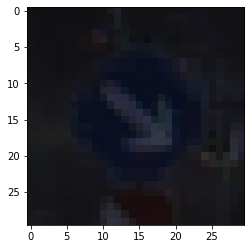

In [14]:
plt.imshow(test_images[2578])

In [15]:
classes[test_labels[2578]]

'Keep right'

## Shuffling the Train Dataset 

In [16]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=53)

## Visualization the Data

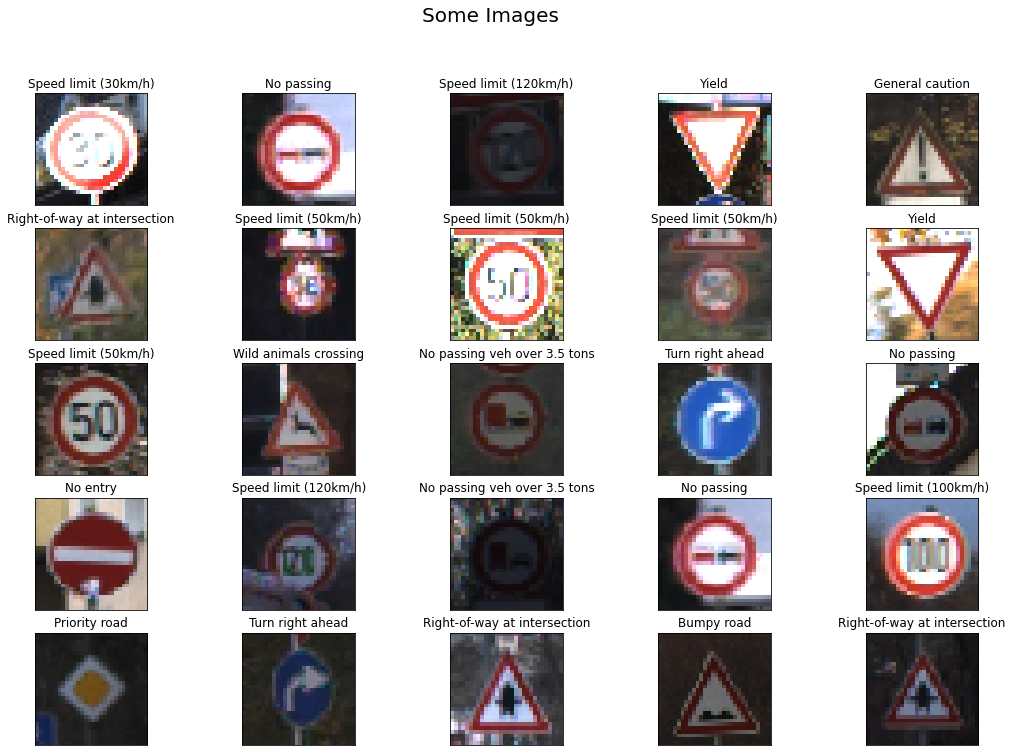

In [17]:
fig=plt.figure(figsize=(18,12));
fig.suptitle("Some Images",fontsize=20)

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([]);
    plt.yticks([]);
    plt.grid(False)
    label=classes[train_labels[i]]
    plt.title(label=label)
    plt.imshow(train_images[i]);
    

In [18]:
labels_df=pd.DataFrame( [list(classes.values()) , pd.DataFrame(train_labels).value_counts().values],index=["class","count"] ).sort_index().T
labels_df

,class,count
0,Speed limit (20km/h),1808
1,Speed limit (30km/h),1779
2,Speed limit (50km/h),1735
3,Speed limit (60km/h),1675
4,Speed limit (70km/h),1662
5,Speed limit (80km/h),1604
6,End of speed limit (80km/h),1566
7,Speed limit (100km/h),1442
8,Speed limit (120km/h),1181
9,No passing,1180


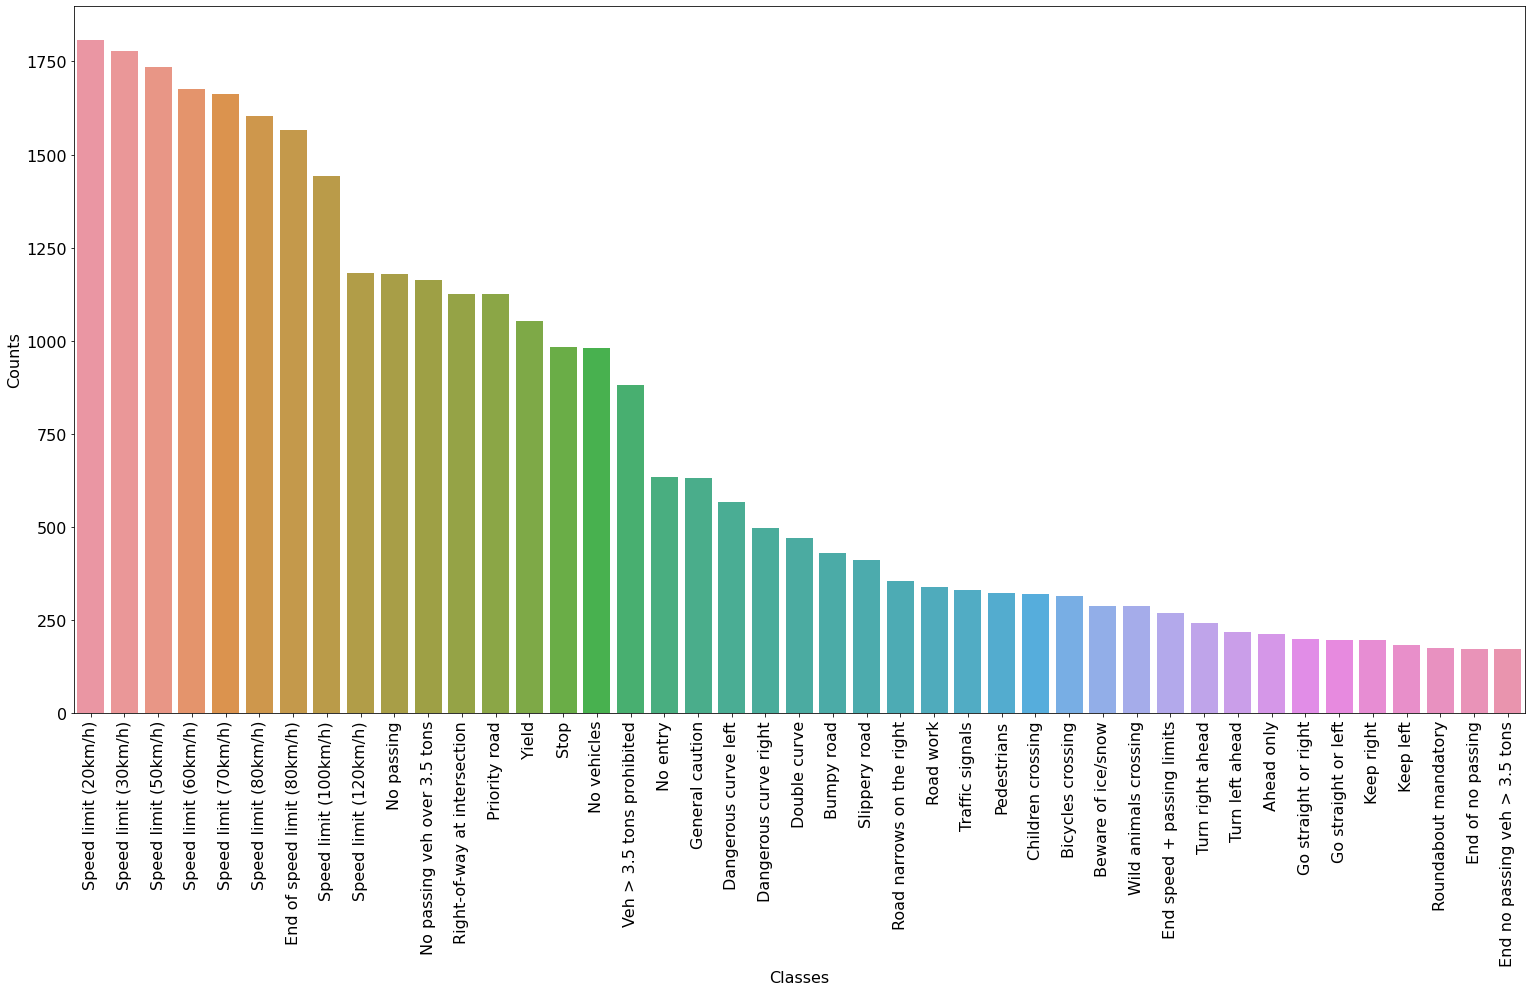

In [19]:
plt.figure(figsize=(26,13));
sns.barplot(x=labels_df['class'],y=labels_df['count']);
plt.xticks(rotation=90,size=16);
plt.yticks(size=16);
plt.xlabel(xlabel="Classes",size=16);
plt.ylabel(ylabel="Counts",size=16);

## Data Augmentation

In [20]:
aug=ImageDataGenerator(rotation_range=45,
                      vertical_flip=True,
                      horizontal_flip=True,
                      width_shift_range=0.2,
                      shear_range=0.15,
                      zoom_range=0.15,
                      height_shift_range=0.2,
                      fill_mode="nearest")

In [21]:
train_gen=aug.flow(train_images,train_labels,batch_size=64)

## Making the Model with Tensorflow

In [22]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization(axis=-1))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization(axis=-1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))

#Final Layer(Prediction Layer)
model.add(tf.keras.layers.Dense(43,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

In [23]:
LR=0.001
EPOCHS=30
BS=64

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
history=model.fit(train_gen,batch_size=BS,
                  epochs=EPOCHS,
                  validation_data=(test_images,test_labels))

Epoch 1/30
491/491 [==============================] - 107s 215ms/step - loss: 2.8042 - accuracy: 0.2746 - val_loss: 2.5286 - val_accuracy: 0.2586
Epoch 2/30
491/491 [==============================] - 103s 210ms/step - loss: 1.5867 - accuracy: 0.4963 - val_loss: 1.0530 - val_accuracy: 0.6323
Epoch 3/30
491/491 [==============================] - 103s 210ms/step - loss: 1.1815 - accuracy: 0.6049 - val_loss: 0.8034 - val_accuracy: 0.7172
Epoch 4/30
491/491 [==============================] - 103s 209ms/step - loss: 0.9488 - accuracy: 0.6802 - val_loss: 0.6692 - val_accuracy: 0.7714
Epoch 5/30
491/491 [==============================] - 103s 209ms/step - loss: 0.7931 - accuracy: 0.7296 - val_loss: 0.6586 - val_accuracy: 0.7701
Epoch 6/30
491/491 [==============================] - 103s 209ms/step - loss: 0.6781 - accuracy: 0.7671 - val_loss: 0.4315 - val_accuracy: 0.8490
Epoch 7/30
491/491 [==============================] - 103s 209ms/step - loss: 0.6102 - accuracy: 0.7925 - val_loss: 0.5760 -

In [25]:
model.save("traffic_signs_model.h5")

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.804222,0.274576,2.528630,0.258575
1,1.586714,0.496302,1.052963,0.632284
2,1.181499,0.604871,0.803425,0.717200
3,0.948817,0.680161,0.669163,0.771388
4,0.793125,0.729632,0.658620,0.770113
5,0.678095,0.767085,0.431527,0.849037
6,0.610247,0.792522,0.576045,0.799311
7,0.555312,0.810245,0.329847,0.881678
8,0.505092,0.827139,0.270815,0.900038
9,0.485527,0.834502,0.234049,0.915339


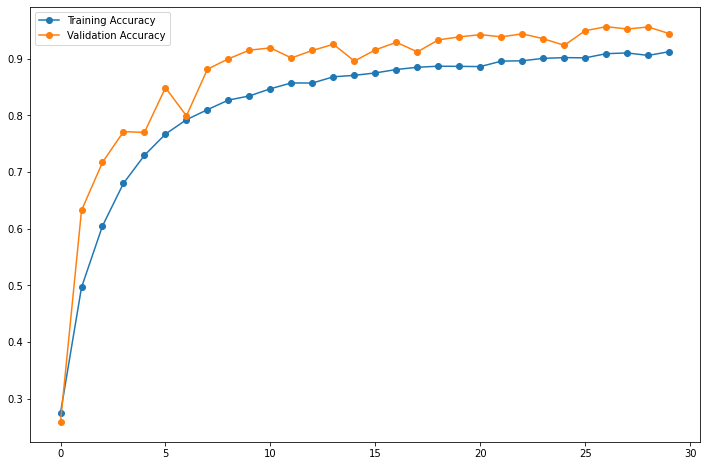

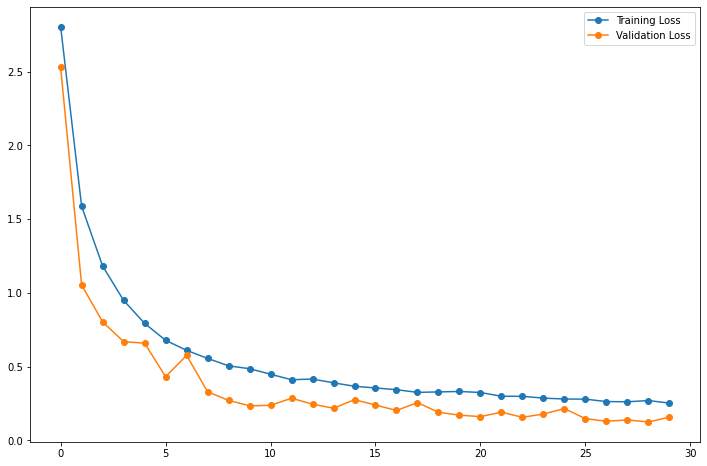

In [38]:
loss=history.history["loss"]
accuracy=history.history["accuracy"]

val_loss=history.history["val_loss"]
val_accuracy=history.history["val_accuracy"]

epochs=range(0,30)

plt.figure(figsize=(12,8));

plt.plot(epochs,accuracy,label="Training Accuracy",marker="o");
plt.plot(epochs,val_accuracy,label="Validation Accuracy",marker="o");
plt.legend()

plt.show();

plt.figure(figsize=(12,8));

plt.plot(epochs,loss,label="Training Loss",marker="o");
plt.plot(epochs,val_loss,label="Validation Loss",marker="o");
plt.legend()

plt.show();

In [39]:
test_pred=model.predict(test_images)

In [52]:
test_pred_max=[]
for i in range(len(test_pred)):
  test_pred_max.append(test_pred[i].argmax())
print("Some Test Images Labels:",test_labels[:20])
print("Some Predictions:",test_pred_max[:20])


Some Test Images Labels: [ 3  8  9  3 25 26 11  5  2  1 38  4 26 41 38 31 28 10 17 38]
Some Predictions: [3, 8, 9, 3, 25, 26, 11, 5, 2, 1, 38, 4, 31, 41, 38, 31, 28, 10, 17, 38]


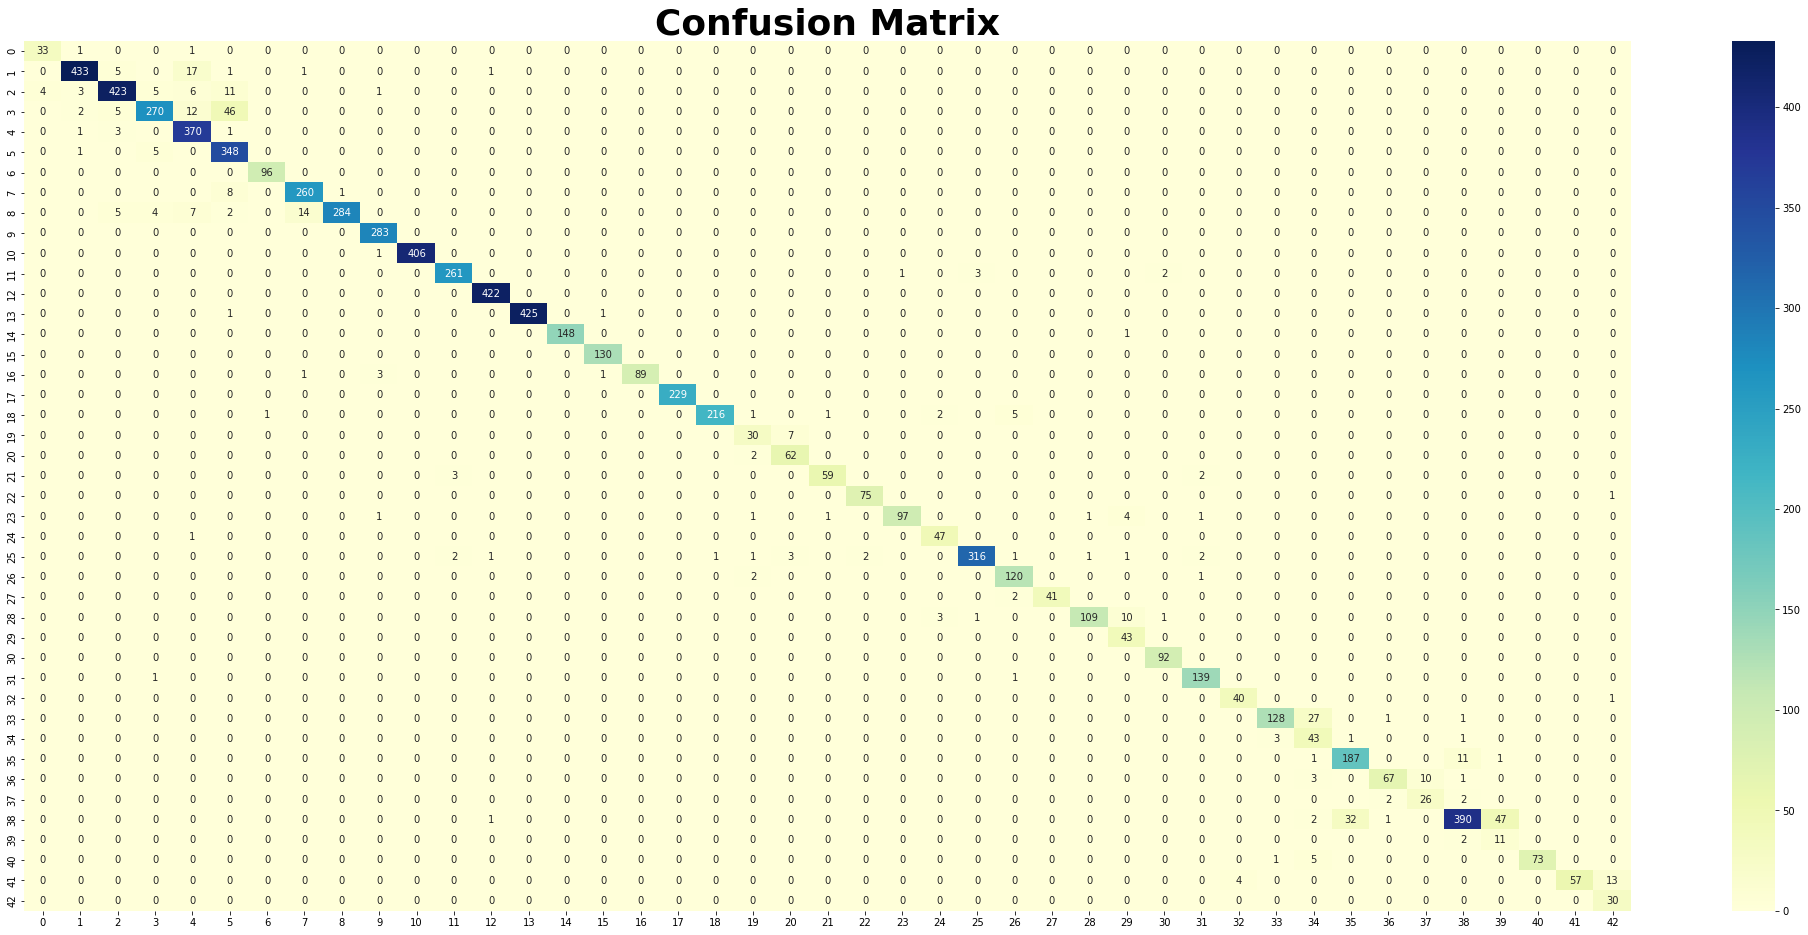

In [58]:
plt.figure(figsize=(36,16));
sns.heatmap(confusion_matrix(test_pred_max,test_labels),annot=True,fmt=".0f",cmap="YlGnBu");
plt.title("Confusion Matrix",fontsize=36,fontweight="bold");